# CAN Workshop- LFADS demo in pytorch

## Import necessary modules

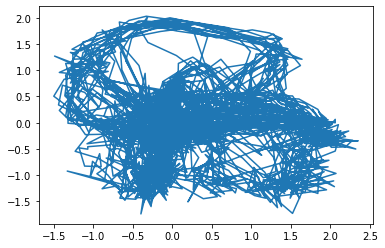

In [34]:
%matplotlib inline

import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

import os
import yaml
import math
from lfads_k09 import LFADS_Net
from utils import read_data, load_parameters, save_parameters
import scipy.io
# plt.style.use('dark_background')
import shutil

qz_est_norm = np.loadtxt('lfads_k09_01121446.csv', delimiter=',')
plt.figure()
plt.plot(qz_est_norm[:,0],qz_est_norm[:,1])

In [29]:
all_time =15000
start_time = 12000
Time = 20
neuron_num = 76
datax = scipy.io.loadmat("spike76_k09_17000.mat")
y_data = datax["spike76_k09_17000"][:,start_time:all_time].T
traj = scipy.io.loadmat("trj76_k09_17000.mat")
traj = traj["trj76_k09_17000"][:,start_time:all_time].T

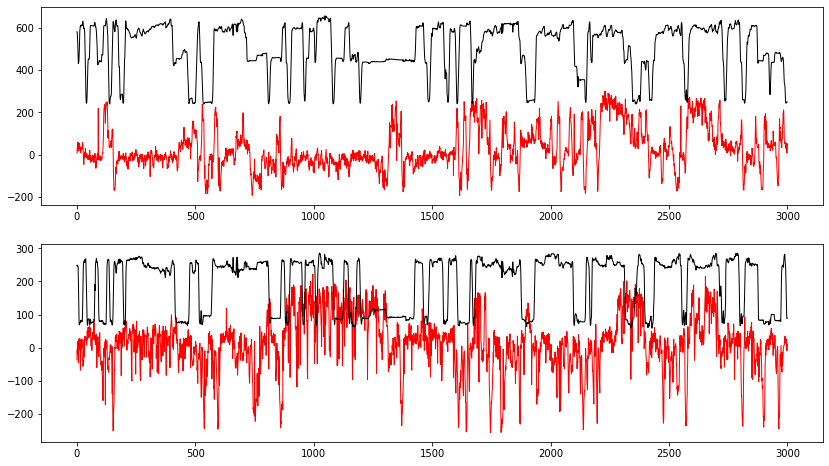

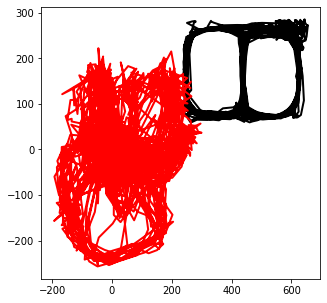

In [35]:
import funs
from scipy import signal
z_true_c = traj# - x_test.mean(axis=0)
z_true_norm = z_true_c#/np.linalg.norm(z_true_c)

R = funs.compute_optimal_rotation(np.stack(qz_est_norm), z_true_norm, scale=True)
qz_est_norm_R = np.stack(qz_est_norm).dot(R)

#qz_est_norm_R[:,0] = signal.savgol_filter(qz_est_norm_R[:,0], 51, 5)
#qz_est_norm_R[:,1] = signal.savgol_filter(qz_est_norm_R[:,1],51, 5)
st=0
en=6000
plt.figure(figsize=(14,8))
plt.subplot(211)
plt_post = plt.plot(qz_est_norm_R[st:en,0],'r', linewidth = 1, label = 'posterior mean')
plt_true = plt.plot(z_true_norm[st:en,0], 'k', linewidth = 1, label = '\"true\" mean')
plt.subplot(212)
plt_post = plt.plot(qz_est_norm_R[st:en,1],'r', linewidth = 1, label = 'posterior mean')
plt_true = plt.plot(z_true_norm[st:en,1], 'k', linewidth = 1, label = '\"true\" mean')

fig = plt.figure(figsize=(5,5))
plt.plot(z_true_norm[st:en,0], z_true_norm[st:en,1], lw=2, color = 'k')
plt.plot(qz_est_norm_R[st:en,0], qz_est_norm_R[st:en,1], lw=2, color = 'r')

In [ ]:
#np.savetxt('lfads_k09_01122003.csv', qz_est_norm, delimiter=',')